# Scriptino per generare e misurare un segnale costante e un segnale sinusoidale

Si procede inizialmente a verificare che Analog Discovery 2 sia funzionante.<br> 
Sono necessari AD2, un computer e dei cavetti.


Abbiamo scritto il seguente script che genera un segnale costante.  <br>
Si è aggiunto un delay fra la generazione della forma d'onda e il sampling per evitare di misurare il transiente in cui il segnale non è costante oppure non ha forma sinusoidale. 



<>:32: SyntaxWarning: invalid escape sequence '\D'
<>:32: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_9888\2829340856.py:32: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Dispositivo #1 [SN:210321B1F388, hdwf=1] connesso!
Configurazione #1


Text(0, 0.5, '$\\Delta V$[V]')

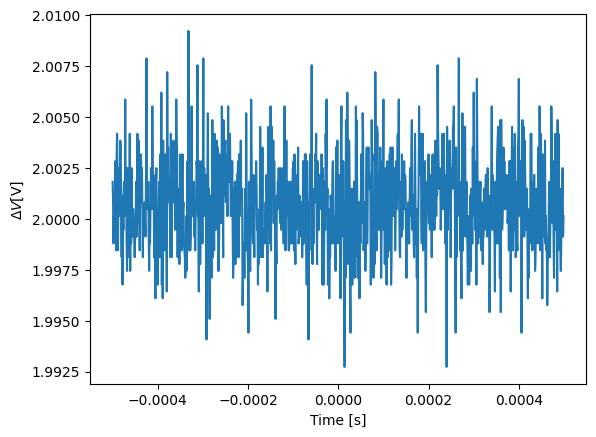

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio
wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione del generatore di funzioni

### Settings del generatore di funzioni
wgen.w1.offs = 2 # offset dell'onda generata
wgen.w1.func = tdwf.funcDC # tipo di segnale generato

### Inizio generazione segnale
wgen.w1.start()

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 1000 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # si aspetta mezzo secondo per assicurare di non misurare il transiente in cui il segnale non è costante
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura01.txt", data, delimiter="\t")
### Plotting
plt.title("")
plt.plot(scope.time.vals, scope.ch1.vals)
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")

Cambiamo solo la forma d'onda: acquisiamo dati per una forma d'onda sinusoidale.


<>:36: SyntaxWarning: invalid escape sequence '\D'
<>:36: SyntaxWarning: invalid escape sequence '\D'
C:\Users\franc\AppData\Local\Temp\ipykernel_13152\338935565.py:36: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel("$\Delta V$[V]")


Text(0, 0.5, '$\\Delta V$[V]')

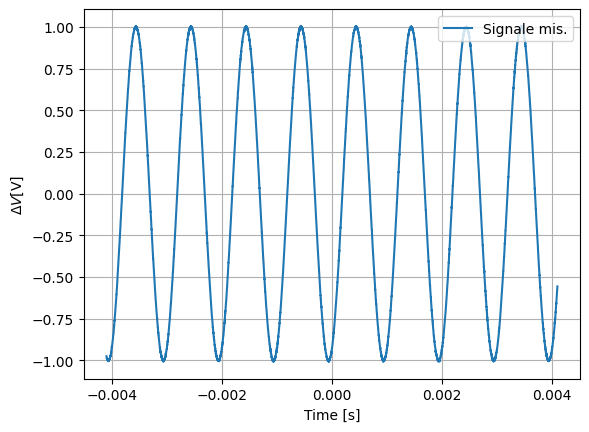

In [ ]:
import tdwf
import matplotlib.pyplot as plt
import numpy as np
import time

### Inizializzazioni
ad2 = tdwf.AD2() # dichiarazione dell'analog discovery 2
scope = tdwf.Scope(ad2.hdwf) # inizializzazione dell'oscilloscopio
wgen = tdwf.WaveGen(ad2.hdwf) # inizializzazione del generatore di funzioni

### Settings del generatore di funzioni
wgen.w1.offs = 0 # offset dell'onda generata
wgen.w1.func = tdwf.funcSine # tipo di segnale generato

### Inizio generazione segnale
wgen.w1.start()

### Setting dell'oscilloscopio
scope.fs = 1e6 # frequenza a cui plotta
scope.npt = 8192 # numero di punti memorizzati
scope.ch1.rng=5 # definisco il range (mi definisce anche la risoluzione minima su y = max/bit)

### Inizio sampling
time.sleep(0.5) # si aspetta mezzo secondo per assicurare di non misurare il transiente in cui il segnale non è costante
scope.sample() # inizia il sampling
data = np.column_stack((scope.time.vals, scope.ch1.vals)) 
np.savetxt("misura02.txt", data, delimiter="\t")
# Plotting
plt.title("")
plt.plot(scope.time.vals, scope.ch1.vals, grid=True, label="Segnale mis.")
data = np.loadtxt("misura02.txt", delimiter="\t", unpack=True)
plt.legend(loc="upper right")
plt.grid()
plt.xlabel("Time [s]")
plt.ylabel("$\Delta V$[V]")